Colab Notebook:

https://colab.research.google.com/drive/1rSyF6J1L8J1j3ANtYDbzl_qGHiBDVdqs?usp=sharing

Note: Transofrmers is not working in local.

# Imports

In [ ]:
!pip install 'transformers[torch]'

In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_csv('/content/text_profiled_data.csv')

In [ ]:
data_df.shape

(1000, 29)

# Feature Correlation

<ipython-input-5-964463f7136b>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data_df.corr(), cmap="Reds", annot=True)


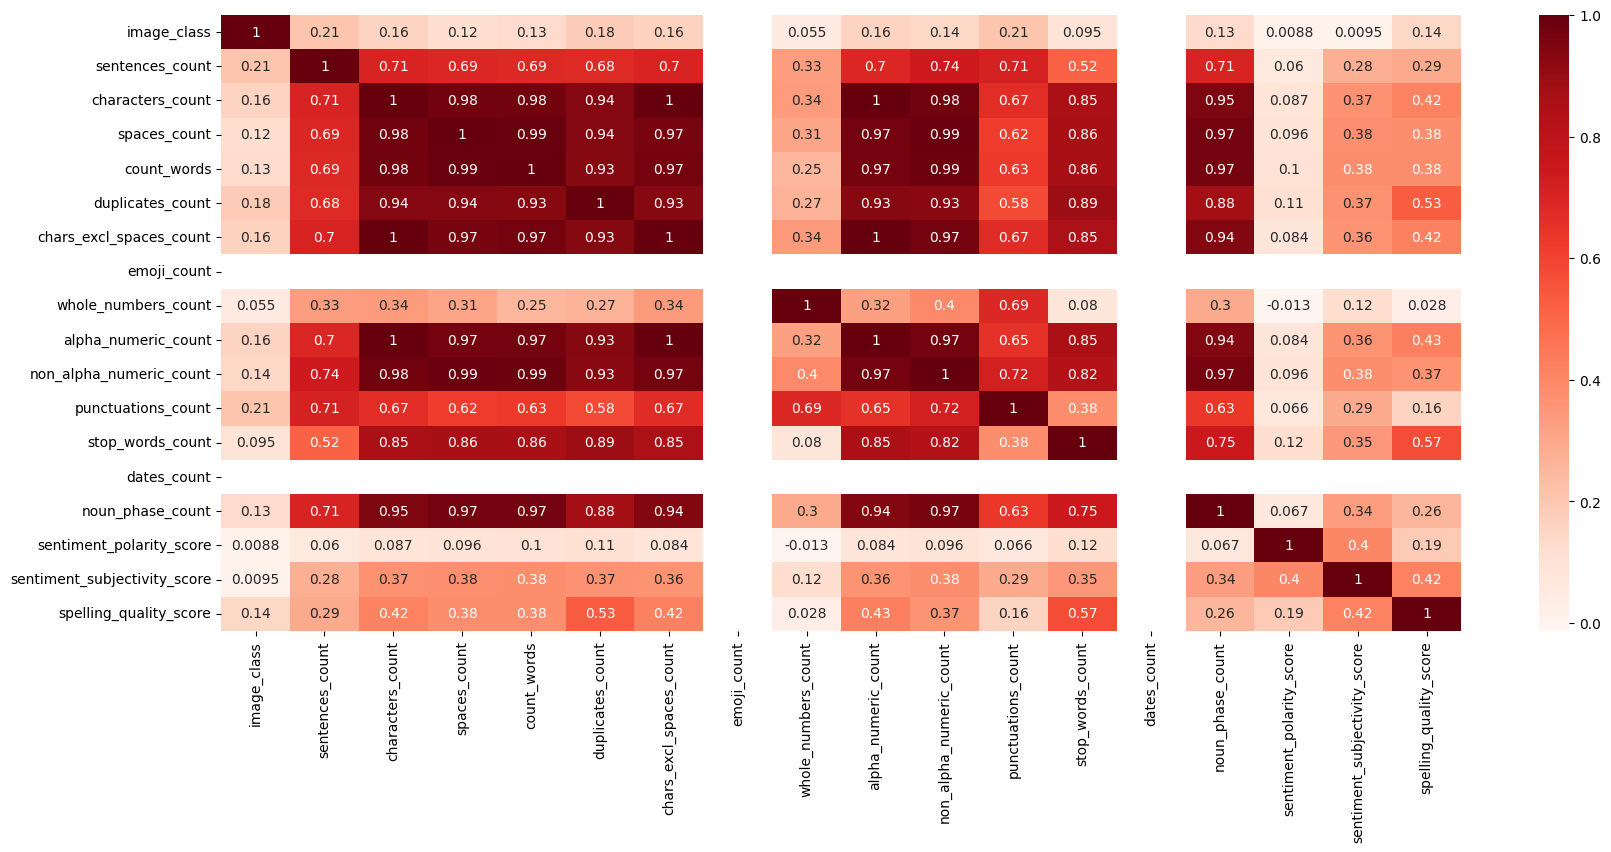

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20, 8))

# plotting correlation heatmap
dataplot = sb.heatmap(data_df.corr(), cmap="Reds", annot=True)

# displaying heatmap
plt.show()

#### Correlation plot depicts how variables are dependent on each other, here we see some of the such scenarios.

#### Dropping the highly correlated variables to prevent model from getting biased.

In [ ]:
data_df = data_df.drop(columns=['spaces_count','emoji_count','non_alpha_numeric_count','dates_count'],axis=1)

# Understanding Categocial Variables

In [ ]:
data_df.dtypes

image                                 object
image_class                            int64
text                                  object
text_body                             object
entites                               object
keywords                              object
sentences_count                        int64
characters_count                       int64
count_words                            int64
duplicates_count                       int64
chars_excl_spaces_count                int64
whole_numbers_count                    int64
alpha_numeric_count                    int64
punctuations_count                     int64
stop_words_count                       int64
noun_phase_count                       int64
sentiment_polarity_score             float64
sentiment_polarity                    object
sentiment_polarity_summarised         object
sentiment_subjectivity_score         float64
sentiment_subjectivity                object
sentiment_subjectivity_summarised     object
spelling_q

In [ ]:
print('sentiment_subjectivity_score : ', data_df ['sentiment_subjectivity_score'][0],'\n')
print('sentiment_subjectivity :', data_df ['sentiment_subjectivity'][0],'\n')
print('sentiment_subjectivity_summarised :', data_df ['sentiment_subjectivity_summarised'][0],'\n')

sentiment_subjectivity_score :  0.4457407407407407 

sentiment_subjectivity : Objective/subjective 

sentiment_subjectivity_summarised : Objective/subjective 



In [ ]:
print('spelling_quality_score :', data_df ['spelling_quality_score'][0],'\n')
print('spelling_quality :', data_df ['spelling_quality'][0],'\n')
print('spelling_quality_summarised :', data_df ['spelling_quality_summarised'][0],'\n')

spelling_quality_score : 0.7009063444108761 

spelling_quality : Bad 

spelling_quality_summarised : Bad 



In [ ]:
print('Keywords : ', data_df ['keywords'][0])

Keywords :  ['NBIFO Institut fiir', 'fiir biologische Forschung', 'Institut fiir biologische', 'biologische Forschung FuggerstiaGe', 'NBIFO Institut', 'biologische Forschung', 'Aare bid.Dresdner Bank', 'Institut fiir', 'Lung function determinations', 'Slaclspatasse Kain.', 'Posechocs Kain.', 'RRGIFD institut', 'fiir biologische', 'Toxicology Tribune', 'Forschung FuggerstiaGe']


In [ ]:
print('Entites : ', data_df ['entites'][0])

Entites :  {'nairo': 'GPE', 'Dresdner Bank AG': 'ORG', 'TNO-CIVO Toxicology and Nutrition Institute': 'ORG', 'The Netherlands': 'GPE', 'Vero': 'ORG', 'Ona D..te der Genera': 'ORG', 'Koln': 'ORG'}


1. sentiment_subjectivity_score,spelling_quality_score, sentiment_polarity_score are present, we can ignore the object entites.

2. Keywords and Entity Embeddings can be used later to give some weight for these keywords.

In [ ]:

columns_selected = ['image', 'image_class',
       'sentences_count', 'characters_count', 'count_words',
       'duplicates_count', 'chars_excl_spaces_count', 'whole_numbers_count',
       'alpha_numeric_count', 'punctuations_count', 'stop_words_count',
       'noun_phase_count', 'sentiment_polarity_score', 'sentiment_subjectivity_score',
       'spelling_quality_score']


selected_data_df = data_df[columns_selected]

In [ ]:
selected_data_df

,image,image_class,sentences_count,characters_count,count_words,duplicates_count,chars_excl_spaces_count,whole_numbers_count,alpha_numeric_count,punctuations_count,stop_words_count,noun_phase_count,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score
0,image_0794.png,0,12,2256,346,37,1937,42,1852,84,78,159,0.130000,0.445741,0.700906
1,image_0757.png,0,3,1593,218,35,1394,18,1350,44,31,122,0.103788,0.290404,0.807882
2,image_0395.png,0,3,862,142,22,754,14,703,51,33,46,0.291667,0.345833,0.758929
3,image_0427.png,0,9,1524,264,29,1289,11,1240,49,99,94,-0.289048,0.647619,0.824490
4,image_0552.png,0,2,1889,311,21,1611,11,1562,49,67,159,0.289881,0.372173,0.589286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,image_0837.png,9,4,1214,185,20,1045,21,999,46,30,79,0.116340,0.504248,0.747126
996,image_0189.png,9,25,2790,466,42,2357,29,2263,93,96,229,0.142195,0.482887,0.714286
997,image_0764.png,9,6,1402,276,21,1161,13,1102,59,40,147,0.333333,0.511111,0.552419
998,image_0994.png,9,22,2417,469,39,1982,13,1911,71,85,257,0.142296,0.398402,0.614035


Check Nulls

In [ ]:
print(selected_data_df.isnull().sum())

image                           0
image_class                     0
sentences_count                 0
characters_count                0
count_words                     0
duplicates_count                0
chars_excl_spaces_count         0
whole_numbers_count             0
alpha_numeric_count             0
punctuations_count              0
stop_words_count                0
noun_phase_count                0
sentiment_polarity_score        0
sentiment_subjectivity_score    0
spelling_quality_score          0
dtype: int64


# Embeddings

## Transformers

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

class TransformerModel():

    def __init__(self,model_name):

        self.TOKENIZERS_PARALLELISM = True
        self.MODEL = AutoModel.from_pretrained(model_name)
        self.TOKENIZER = AutoTokenizer.from_pretrained(model_name)


    def get_normalized_embeddings(self,text):

        # Tokenize and encode the input text
        inputs = self.TOKENIZER(text, return_tensors='pt', truncation=True, padding=True, max_length=512 )

        # Forward pass to get hidden states
        with torch.no_grad():
            outputs = self.MODEL(**inputs)

        # Extract embeddings from the last layer
        last_hidden_states = outputs.last_hidden_state

        # Use the [CLS] token representation as the sentence embedding
        cls_embedding = last_hidden_states[:, 0, :].numpy()

        # Normalize the embedding
        normalized_embedding = cls_embedding / np.linalg.norm(cls_embedding)

        return normalized_embedding



In [ ]:
miniLM_model =  TransformerModel(model_name = "microsoft/MiniLM-L12-H384-uncased")

In [ ]:
data_df['embeddings'] = data_df['text_body'].apply(lambda x:  miniLM_model.get_normalized_embeddings(x))

In [ ]:
data_df

,image,image_class,text,text_body,entites,keywords,sentences_count,characters_count,count_words,duplicates_count,...,sentiment_polarity_score,sentiment_polarity,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised,embeddings
0,image_0794.png,0,nairo |.Bis {NBIFO Institut fiir biologische F...,nairo .Bis NBIFO Institut fiir biologische For...,"{'nairo': 'GPE', 'Dresdner Bank AG': 'ORG', 'T...","['NBIFO Institut fiir', 'fiir biologische Fors...",12,2256,346,37,...,0.130000,Pretty positive,Positive,0.445741,Objective/subjective,Objective/subjective,0.700906,Bad,Bad,"[[-0.01258039, 0.0040619415, 0.00048403553, 0...."
1,image_0757.png,0,Aqua L “Risa.2} 30/48.Ro).SMEy.PHILIP MORRIS.‘...,Aqua L Risa.2 3048.Ro.SMEy.PHILIP MORRIS.U.S.A...,"{'NEW YORK': 'GPE', 'N.Y': 'GPE', 'May & Speh,...","['proprietary and confidential', 'Marketing an...",3,1593,218,35,...,0.103788,Pretty positive,Positive,0.290404,Pretty objective,Objective,0.807882,Bad,Bad,"[[-0.010364823, 0.004673516, -0.00024935981, 0..."
2,image_0395.png,0,fa) Re fer pos.CG.NOC.Ne.(sR).jae.R.J. REYNOLD...,fa Re fer pos.CG.NOC.Ne.sR.jae.R.J. REYNOLDS T...,{'R.J. REYNOLDS TOBACCO COMPANY.WINSTON': 'ORG...,"['retailers and vendors', 'WINSTON SUPER KING'...",3,862,142,22,...,0.291667,Pretty positive,Positive,0.345833,Pretty objective,Objective,0.758929,Bad,Bad,"[[-0.010054159, 0.0016149555, 0.0012893138, 0...."
3,image_0427.png,0,c.0.P.TY.Dr. Murco HN. Roegholt.Baarn 2h<9+57....,c.0.P.TY.Dr. Murco HN. Roegholt.Baarn 2h957.ca...,"{'the Netherlands).To': 'GPE', 'Medical Colleg...","['cigarette-butts of cigarettes', 'Negus.Direc...",9,1524,264,29,...,-0.289048,Pretty negative,Negative,0.647619,Pretty subjective,Subjective,0.824490,Bad,Bad,"[[-0.010782524, 0.0037196612, 0.0021931955, 0...."
4,image_0552.png,0,in.GALLAHER LIMITED.nO aaa.g HINGEWAY + LONDON...,in.GALLAHER LIMITED.nO aaa.g HINGEWAY LONDON W...,"{'GALLAHER LIMITED.nO': 'ORG', 'LONDON': 'GPE'...","['loos of Inporial', 'vious of tho.Leet', 'Con...",2,1889,311,21,...,0.289881,Pretty positive,Positive,0.372173,Pretty objective,Objective,0.589286,Pretty bad,Bad,"[[-0.016791146, 0.0056372113, 0.00089970016, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,image_0837.png,9,got.we wes.FROM THE OFFICE OF U.S. SENATOFP.WA...,got.we wes.FROM THE OFFICE OF U.S. SENATOFP.WA...,"{'WASHINGTON': 'GPE', 'D.C.': 'GPE', 'FTC': 'O...","['SENATE OFFICE BUILDING', 'OFFICE BUILDING', ...",4,1214,185,20,...,0.116340,Pretty positive,Positive,0.504248,Objective/subjective,Objective/subjective,0.747126,Bad,Bad,"[[-0.012591238, 0.0024473767, 0.00093867106, 0..."
996,image_0189.png,9,"JOC L403 070.“>.‘WELLS, RICH, GREENE IN CANADA...",JOC L403 070.WELLS RICH GREENE IN CANADA .Well...,"{'RICH': 'GPE', 'GREENE': 'GPE', 'CANADA': 'GP...","['idiste tat MeCanw', 'Canal whith', 'Welly Ri...",25,2790,466,42,...,0.142195,Pretty positive,Positive,0.482887,Objective/subjective,Objective/subjective,0.714286,Bad,Bad,"[[-0.017429255, 0.0023515297, 0.0014155072, 0...."
997,image_0764.png,9,y.Institute.¥ hits b:.acks . *.Nat curbs = | S...,y.Institute. hits b.acks .Nat curbs Smoking re...,"{'SOSH': 'ORG', 'COSH': 'ORG', 'the ody ich ad...","['eon a aes.Fe', 'PAE Zotac laine', 'ELE scant...",6,1402,276,21,...,0.333333,Pretty positive,Positive,0.511111,Objective/subjective,Objective/subjective,0.552419,Pretty bad,Bad,"[[-0.01867187, 0.003912155, 0.0006412291, 0.00..."
998,image_0994.png,9,The Arizona Republic/THE PHOENIX GAZETTE . Wed...,The Arizona RepublicTHE PHOENIX GAZETTE . Wed ...,"{'The Arizona Republic': 'ORG', 'We': 'GPE', '...","['smells and stinks', 'stinks and water.UG', '...",22,2417,469,39,...,0.142296,Pretty positive,Positive,0.398402,Pretty objective,Objective,0.614035,Bad,Bad,"[[-0.017410701, 0.004032991, 0.0017650774, 0.0..."


 Getting Embedding Dataframe

In [ ]:
embeddings_list = data_df['embeddings'].tolist()

flat_embeddings = [item for sublist in embeddings_list for item in sublist]

# Convert embeddings to a DataFrame
columns = [f'embed_feature_{i+1}' for i in range(len(flat_embeddings[0]))]
embeddings_df = pd.DataFrame(flat_embeddings, columns=columns)

# Display the DataFrame
embeddings_df

,embed_feature_1,embed_feature_2,embed_feature_3,embed_feature_4,embed_feature_5,embed_feature_6,embed_feature_7,embed_feature_8,embed_feature_9,embed_feature_10,...,embed_feature_375,embed_feature_376,embed_feature_377,embed_feature_378,embed_feature_379,embed_feature_380,embed_feature_381,embed_feature_382,embed_feature_383,embed_feature_384
0,-0.012580,0.004062,0.000484,0.003235,-0.000012,0.001393,0.001375,0.005689,-0.006721,0.000820,...,0.000662,-0.003625,-0.009486,0.000792,-0.006163,0.000395,-0.006680,0.003040,-0.016223,0.000102
1,-0.010365,0.004674,-0.000249,0.002764,-0.000149,-0.000769,0.001287,0.005137,-0.002135,0.000689,...,-0.000353,-0.002826,-0.007968,-0.000859,-0.005365,0.000788,-0.004773,0.001273,-0.015015,-0.000380
2,-0.010054,0.001615,0.001289,0.004475,-0.001258,0.001303,0.001586,0.006347,-0.005895,0.000636,...,0.002076,-0.001355,-0.007374,0.001285,-0.005671,-0.001008,-0.005850,0.000896,-0.012871,0.001004
3,-0.010783,0.003720,0.002193,0.005298,-0.001747,0.000976,0.001098,0.007236,-0.006296,-0.000436,...,0.001234,-0.001933,-0.009194,0.003223,-0.006184,-0.000011,-0.008010,0.001840,-0.013203,0.000929
4,-0.016791,0.005637,0.000900,0.006323,-0.001516,0.003280,0.004497,0.009267,-0.006956,-0.000970,...,0.003268,-0.004070,-0.011892,0.002765,-0.008220,0.000921,-0.009694,0.005725,-0.013242,-0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.012591,0.002447,0.000939,0.004988,0.000579,0.001665,0.002242,0.005059,-0.005570,0.000757,...,0.001618,-0.000499,-0.009738,0.003747,-0.004378,-0.001330,-0.006349,0.000669,-0.013461,0.000175
996,-0.017429,0.002352,0.001416,0.006698,-0.000521,0.003054,0.003890,0.008635,-0.005477,0.000742,...,0.001593,-0.004907,-0.012072,0.000635,-0.007178,0.000632,-0.008821,0.006659,-0.015505,-0.001212
997,-0.018672,0.003912,0.000641,0.005532,-0.000343,0.003515,0.003264,0.008023,-0.004370,-0.001136,...,0.001031,-0.003042,-0.010326,0.001625,-0.005561,-0.000739,-0.010907,0.005671,-0.013264,0.000405
998,-0.017411,0.004033,0.001765,0.005929,0.001388,0.002854,0.003779,0.007182,-0.001599,-0.001944,...,0.001715,-0.005221,-0.011606,0.001506,-0.006675,0.002759,-0.011822,0.006676,-0.014857,0.000219


In [ ]:
selected_data_df = pd.concat([selected_data_df,embeddings_df], axis = 1)

In [ ]:
selected_data_df.to_csv('train_dataset_transformers.csv',index=False)

In [ ]:
data_df[['image','image_class','embeddings']].to_csv('embedding_dataset_transformers.csv',index=False)

## Sentence Transofrmers

In [ ]:
class EmbedFeatures():
    def __init__(self,model_name):

        self.model = AutoModel.from_pretrained(model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

    def mean_pooling(self,model_output, attention_mask):
        token_embeddings = model_output[0] #First element of model_output contains all token embeddings
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


    def get_embedding(self,text,return_pt= False):
        encoded_input = self.tokenizer(text, padding=True, truncation=True, return_tensors='pt',max_length=512 )
        # Compute token embeddings
        with torch.no_grad():
            model_output = self.model(**encoded_input)

        sentence_embedding = self.mean_pooling(model_output, encoded_input['attention_mask'])
        if return_pt == True:
            return sentence_embedding
        else:
            return sentence_embedding.detach().numpy()

In [ ]:
miniLM_model = EmbedFeatures(model_name = 'sentence-transformers/all-MiniLM-L6-v2')

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
data_df['embeddings'] = data_df['text_body'].apply(lambda x:  miniLM_model.get_embedding(x))

In [ ]:
data_df['embeddings'][0].shape

(1, 384)

In [ ]:
embeddings_list = data_df['embeddings'].tolist()

flat_embeddings = [item for sublist in embeddings_list for item in sublist]

# Convert embeddings to a DataFrame
columns = [f'embed_feature_{i+1}' for i in range(len(flat_embeddings[0]))]
embeddings_df = pd.DataFrame(flat_embeddings, columns=columns)

# Display the DataFrame
embeddings_df

,embed_feature_1,embed_feature_2,embed_feature_3,embed_feature_4,embed_feature_5,embed_feature_6,embed_feature_7,embed_feature_8,embed_feature_9,embed_feature_10,...,embed_feature_375,embed_feature_376,embed_feature_377,embed_feature_378,embed_feature_379,embed_feature_380,embed_feature_381,embed_feature_382,embed_feature_383,embed_feature_384
0,0.046141,0.025010,-0.019946,-0.038666,-0.026219,-0.001009,-0.007717,0.189513,0.044931,0.147663,...,-0.106508,0.072150,-0.017799,-0.063300,0.039262,-0.048696,0.035328,0.099353,0.034821,0.040528
1,-0.019694,-0.076923,-0.010844,-0.122452,-0.089791,-0.010923,-0.075748,-0.044619,-0.096522,-0.085827,...,0.094623,-0.050354,0.006177,-0.009963,0.000304,0.059330,-0.038030,-0.000266,-0.021503,-0.017757
2,-0.163850,0.086494,-0.092803,0.018345,-0.022029,0.170367,-0.116445,0.063113,-0.074096,0.002619,...,-0.059184,0.052484,-0.155550,0.011906,0.032455,0.067552,0.113477,-0.128880,-0.027782,0.124551
3,0.010152,0.178580,-0.076878,-0.084019,0.008909,0.095561,0.036458,0.154229,0.092853,0.138412,...,-0.165417,0.101617,0.037500,0.117560,0.030595,-0.041368,0.138516,-0.060767,0.045626,0.098060
4,-0.061112,0.048410,-0.000228,0.004958,-0.084308,0.081041,0.111681,0.223759,0.037665,0.154200,...,-0.041002,0.012826,0.042167,0.072382,-0.083284,-0.009803,0.087830,-0.003685,0.071997,0.083276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.057172,0.026288,-0.052385,0.095640,0.116507,0.007920,-0.175921,0.186319,-0.065353,0.069930,...,-0.122622,0.015230,-0.076072,0.086357,-0.016266,-0.127999,0.232198,-0.134044,-0.034147,0.060987
996,-0.096246,0.006728,-0.034955,0.017050,-0.080046,-0.024423,-0.000862,0.145158,0.008925,0.052773,...,0.019602,0.000616,0.034937,0.026750,-0.031970,-0.018872,-0.024868,-0.036682,0.080554,0.040067
997,-0.053437,0.064754,-0.034816,-0.019583,-0.030318,0.069523,0.130890,0.103035,0.072419,0.165360,...,0.038766,-0.041967,0.038980,0.042717,-0.107576,-0.033998,0.105173,-0.003763,0.009469,0.037338
998,-0.103415,0.021642,0.027676,-0.020671,-0.037661,0.047041,0.202719,0.023912,0.134568,0.051326,...,0.063012,-0.093171,-0.006934,0.058604,0.001863,0.007377,0.085388,0.099566,-0.092916,-0.017573


In [ ]:
selected_data_df = pd.concat([selected_data_df,embeddings_df], axis = 1)
selected_data_df.to_csv('train_dataset_sentence_transformers.csv',index=False)
data_df[['image','image_class','embeddings']].to_csv('embedding_dataset_sentence_transformers.csv',index=False)

In [ ]:
selected_data_df


,image,image_class,sentences_count,characters_count,count_words,duplicates_count,chars_excl_spaces_count,whole_numbers_count,alpha_numeric_count,punctuations_count,...,embed_feature_375,embed_feature_376,embed_feature_377,embed_feature_378,embed_feature_379,embed_feature_380,embed_feature_381,embed_feature_382,embed_feature_383,embed_feature_384
0,image_0794.png,0,12,2256,346,37,1937,42,1852,84,...,-0.106508,0.072150,-0.017799,-0.063300,0.039262,-0.048696,0.035328,0.099353,0.034821,0.040528
1,image_0757.png,0,3,1593,218,35,1394,18,1350,44,...,0.094623,-0.050354,0.006177,-0.009963,0.000304,0.059330,-0.038030,-0.000266,-0.021503,-0.017757
2,image_0395.png,0,3,862,142,22,754,14,703,51,...,-0.059184,0.052484,-0.155550,0.011906,0.032455,0.067552,0.113477,-0.128880,-0.027782,0.124551
3,image_0427.png,0,9,1524,264,29,1289,11,1240,49,...,-0.165417,0.101617,0.037500,0.117560,0.030595,-0.041368,0.138516,-0.060767,0.045626,0.098060
4,image_0552.png,0,2,1889,311,21,1611,11,1562,49,...,-0.041002,0.012826,0.042167,0.072382,-0.083284,-0.009803,0.087830,-0.003685,0.071997,0.083276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,image_0837.png,9,4,1214,185,20,1045,21,999,46,...,-0.122622,0.015230,-0.076072,0.086357,-0.016266,-0.127999,0.232198,-0.134044,-0.034147,0.060987
996,image_0189.png,9,25,2790,466,42,2357,29,2263,93,...,0.019602,0.000616,0.034937,0.026750,-0.031970,-0.018872,-0.024868,-0.036682,0.080554,0.040067
997,image_0764.png,9,6,1402,276,21,1161,13,1102,59,...,0.038766,-0.041967,0.038980,0.042717,-0.107576,-0.033998,0.105173,-0.003763,0.009469,0.037338
998,image_0994.png,9,22,2417,469,39,1982,13,1911,71,...,0.063012,-0.093171,-0.006934,0.058604,0.001863,0.007377,0.085388,0.099566,-0.092916,-0.017573


## GENSIM - FASTTEXT

### Using Pretrained Models

In [ ]:
import gensim
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [31]:
wv = api.load('fasttext-wiki-news-subwords-300')

### Tokenizer

In [ ]:
!python -m spacy download en_core_web_md

2023-12-19 23:00:09.521375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 23:00:09.521456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 23:00:09.534430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 23:00:12.547226: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!pip install -U spacy

In [ ]:
import spacy
import numpy as np
import string

nlp = spacy.load("en_core_web_md")


# Creating our tokenizer function
def spacy_tokenizer(sentence,nlp):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    punctuations = string.punctuation
    stop_words = nlp.Defaults.stop_words

    # Lemmatizing each token and converting each token into lowercase
    tokens = [ word.lemma_.lower().strip() for word in doc ]

    # Removing stop words
    tokens = [ word for word in tokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return tokens

In [ ]:
data_df['text_tokens'] = data_df['text_body'].apply(lambda x: spacy_tokenizer(x,nlp))

In [ ]:
# Creating weighted Average Sentrence Embeddings

def sent_vectorizer(sentence):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sentence:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:

data_df['fasttext_embed'] = data_df['text_body'].apply(sent_vectorizer)

In [ ]:
data_df['fasttext_embed']

In [ ]:
embeddings_list = data_df['fasttext_embed'].tolist()

columns = [f'embed_feature_{i+1}' for i in range(300)]
embeddings_df = pd.DataFrame(embeddings_list, columns=columns)


# Display the DataFrame
embeddings_df

In [ ]:
selected_data_df = pd.concat([selected_data_df,embeddings_df], axis = 1)
selected_data_df.to_csv('train_dataset_fasttext.csv',index=False)
data_df[['image','image_class','fasttext_embed']].to_csv('embedding_dataset_fasttext.csv',index=False)